<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13417 non-null  object 
 1   score_date                           13417 non-null  object 
 2   segment_smb                          13417 non-null  int64  
 3   segment_non_smb                      13417 non-null  int64  
 4   segment_commercial                   13417 non-null  int64  
 5   segment_enterprise                   13417 non-null  int64  
 6   segment_midmarket                    13417 non-null  int64  
 7   region_emea                          13417 non-null  int64  
 8   region_apac                          13417 non-null  int64  
 9   region_latam                         13417 non-null  int64  
 10  region_amer                          13417 non-null  int64  
 11  customer_age_quarters       

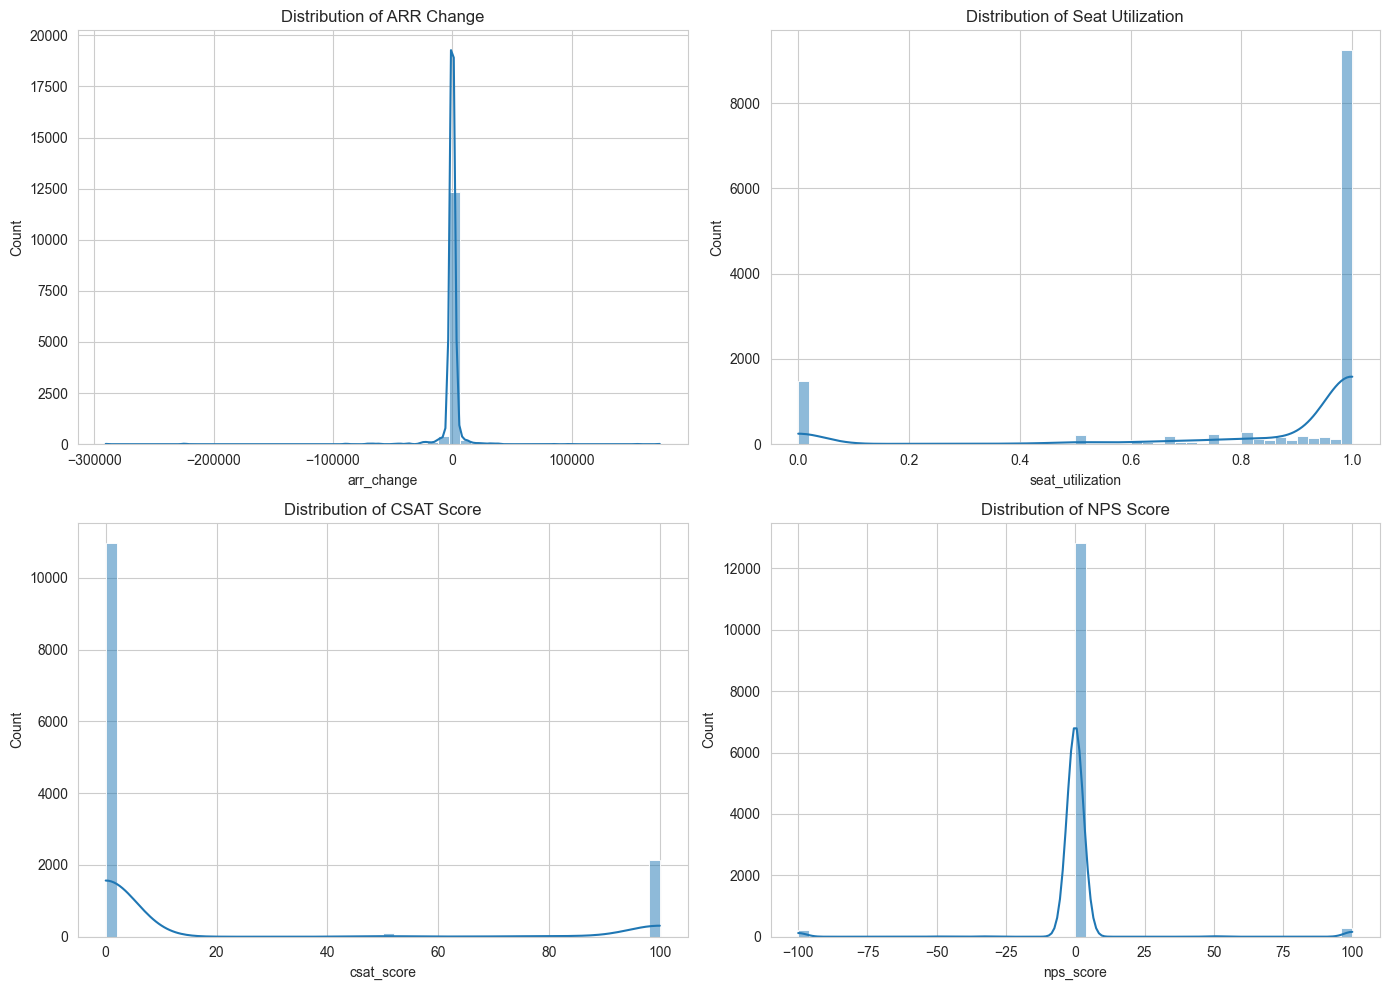

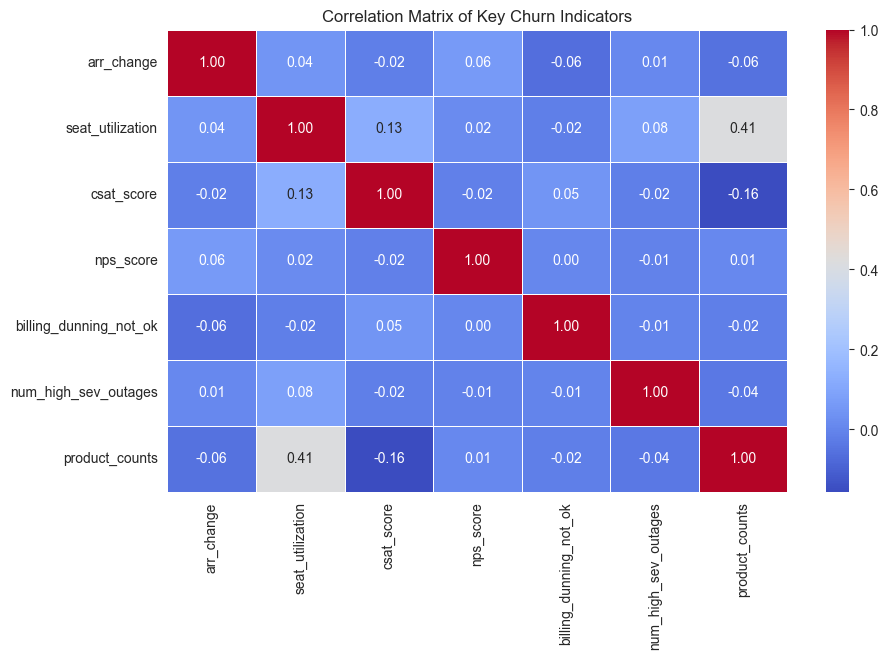

Churn Rate: 0.20727435343221287
churn
0    10636
1     2781
Name: count, dtype: int64
Top 10 Important Features:
 arr_change                             0.211243
seat_utilization                       0.201209
product_change_arr                     0.127882
seat_utilization_M_before              0.103539
seat_change_arr                        0.063290
is_provisioned_any_channel_M_before    0.045718
num_low_sev_outages                    0.042869
future_arr                             0.036408
max_tickets_per_agent                  0.028039
product_counts                         0.025234
dtype: float64
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[2130    0]
 [   0  554]]


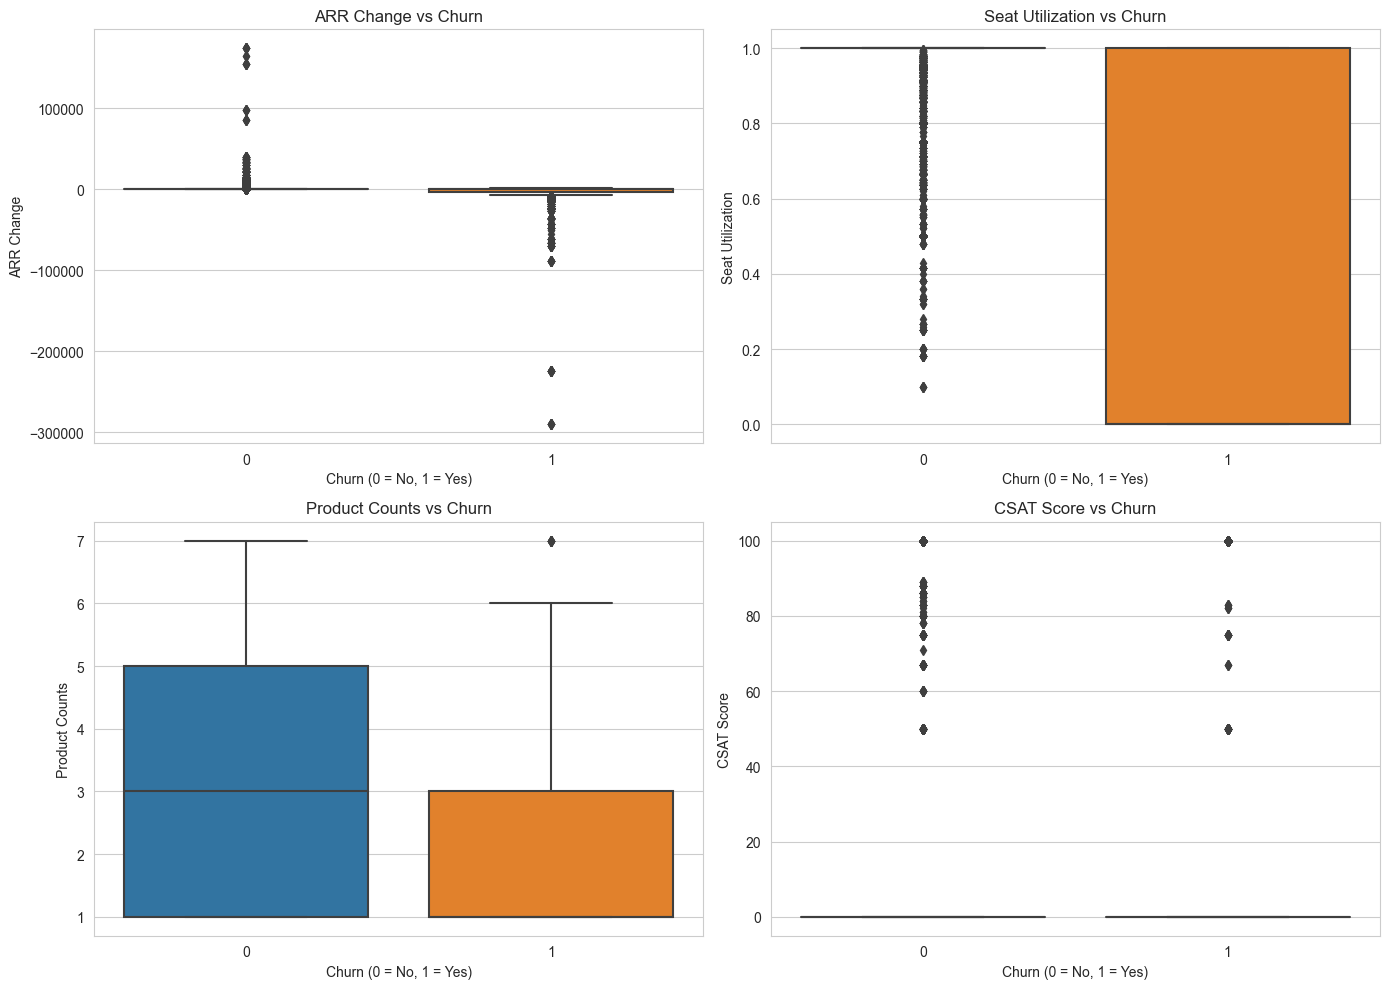

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
file_path = "final.csv" 
df = pd.read_csv(file_path)

# Display basic dataset info
df.info()
print(df.head())

# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df["arr_change"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of ARR Change")

sns.histplot(df["seat_utilization"], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Seat Utilization")

sns.histplot(df["csat_score"], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of CSAT Score")

sns.histplot(df["nps_score"], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of NPS Score")

plt.tight_layout()
plt.show()

# Correlation Heatmap
correlation_matrix = df[["arr_change", "seat_utilization", "csat_score", "nps_score",
                         "billing_dunning_not_ok", "num_high_sev_outages", "product_counts"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Churn Indicators")
plt.show()

# Define churn (ARR decrease < -420 or zero seat utilization)
df["churn"] = ((df["arr_change"] < -420) | (df["seat_utilization"] == 0)).astype(int)
print("Churn Rate:", df["churn"].mean())
print(df["churn"].value_counts())

# Feature Importance Analysis
excluded_cols = ["id", "score_date", "crm_industry_current", "crm_employee_range", "churn"]
features = df.drop(columns=excluded_cols)
label_encoders = {}

for col in features.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

target = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing Key Churn Indicators
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x=df["churn"], y=df["arr_change"], ax=axes[0, 0])
axes[0, 0].set_title("ARR Change vs Churn")
axes[0, 0].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[0, 0].set_ylabel("ARR Change")

sns.boxplot(x=df["churn"], y=df["seat_utilization"], ax=axes[0, 1])
axes[0, 1].set_title("Seat Utilization vs Churn")
axes[0, 1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[0, 1].set_ylabel("Seat Utilization")

sns.boxplot(x=df["churn"], y=df["product_counts"], ax=axes[1, 0])
axes[1, 0].set_title("Product Counts vs Churn")
axes[1, 0].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel("Product Counts")

sns.boxplot(x=df["churn"], y=df["csat_score"], ax=axes[1, 1])
axes[1, 1].set_title("CSAT Score vs Churn")
axes[1, 1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1, 1].set_ylabel("CSAT Score")

plt.tight_layout()
plt.show()
